# Lesson 1: Convolutional Neural Networks

This lesson will utilize convolutional neural networks (CNN's) to do some "computer vision".

We will create a model to use on the dataset from the **[Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats)** competition from [Kaggle.com](https://www.kaggle.com/) that is trained on 25,000 labelled images of dogs and cats to test on 12,500 images. If you can beat 80%, you'll beat what was "state of the art" in 2013.

## Introduction to this week's task: 'Dogs vs Cats'

We're going to try to create a model to enter the [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats) competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): *"**State of the art**: The current literature suggests machine classifiers can score above 80% accuracy on this task"*. So if we can beat 80%, then we will be at the cutting edge as of 2013!

## Google Colab Setup

In [4]:
## cross-check whether the GPU is enabled = should return '/device:GPU:0'
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
### DO THIS EVERY TIME WE CONNECT TO NEW VM
## default environment doesn’t have Pytorch so install manually
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision
  
## install fastai
!pip install fastai

## missing library from import of fastai
!!apt update && apt install -y libsm6 libxext6

torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.
    100% |████████████████████████████████| 430kB 1.8MB/s 
    100% |████████████████████████████████| 1.2MB 877kB/s 
    100% |████████████████████████████████| 1.3MB 854kB/s 
    100% |████████████████████████████████| 71kB 6.0MB/s 
    100% |████████████████████████████████| 256kB 3.5MB/s 
    100% |████████████████████████████████| 20.8MB 58kB/s 


    100% |████████████████████████████████| 24.9MB 51kB/s 
    100% |████████████████████████████████| 3.4MB 362kB/s 
    100% |████████████████████████████████| 112kB 7.1MB/s 
    100% |████████████████████████████████| 61kB 11.1MB/s 
    100% |████████████████████████████████| 2.2MB 517kB/s 
    100% |████████████████████████████████| 552kB 2.1MB/s 
    100% |████████████████████████████████| 4.1MB 308kB/s 
    100% |████████████████████████████████| 61kB 10.0MB/s 
    12% |████                            | 839kB 48.9MB/s eta 0:00:01

    100% |████████████████████████████████| 6.9MB 179kB/s 
    100% |████████████████████████████████| 92kB 6.1MB/s 
    100% |████████████████████████████████| 5.6MB 222kB/s 
    100% |████████████████████████████████| 798kB 1.6MB/s 
    100% |████████████████████████████████| 471kB 2.6MB/s 
    100% |████████████████████████████████| 71kB 8.2MB/s 
    100% |████████████████████████████████| 71kB 9.4MB/s 


    100% |████████████████████████████████| 71kB 8.0MB/s 
    100% |████████████████████████████████| 81kB 9.4MB/s 
  Running setup.py bdist_wheel for fastai ... - done
  Stored in directory: /content/.cache/pip/wheels/13/6b/e1/1f1c38574e6abf3cfd747b345213ed1a4e2bf149646e16408d
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/e9/84/eb/f8f3caa627bb01ebc96034c3411f59870951246e5873b3f4c7
  Running setup.py bdist_wheel for feather-format ... 

- done
  Stored in directory: /content/.cache/pip/wheels/9d/de/23/0ca11012cc6b573de3f8187727cfa97a8392a8605e331214e5
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /content/.cache/pip/wheels/f0/3c/ff/c98870eeb0ca26250ce6a60dc9be23f547b7ef68b3d6a1c0b5
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/20/29/c9/b3d9f2cbdb6f1eeeb98e263ae687d72e8138a26de91058bd0b
  Running setup.py bdist_wheel for torchtext ... - done
  Stored in directory: /content/.cache/pip/wheels/db/5b/0b/6b213778dfd5219687cc5259324390ea27a79b4b13b72038d0
  Running setup.py bdist_wheel for jupyter-latex-envs ... - \ done
  Stored in directory: /content/.cache/pip/wheels/c4/6c/12/312460b777568482fbf308ab45154a573172ac33da9c91cf83
  Running setup.py bdist_wheel for cmd2 ... - done
  Stored in directory: /content/.cache/pip/wheels/11/d7/7a/93eda20d4eb44bd40913277c1f200b175cc8d613f820f3d8f1
  Running setup.py bdist_wh

['',
 'WARNING: apt does not have a stable CLI interface. Use with caution in scripts.',
 '',
 'Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [78.6 kB]',
 'Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease',
 'Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [78.6 kB]',
 'Get:4 http://security.ubuntu.com/ubuntu artful-security/universe Sources [10.5 kB]',
 'Get:5 http://security.ubuntu.com/ubuntu artful-security/universe amd64 Packages [31.8 kB]',
 'Get:6 http://security.ubuntu.com/ubuntu artful-security/main amd64 Packages [95.1 kB]',
 'Get:7 http://archive.ubuntu.com/ubuntu artful-backports InRelease [72.2 kB]',
 'Get:8 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [23.8 kB]',
 'Get:9 http://archive.ubuntu.com/ubuntu artful-updates/main Sources [82.7 kB]',
 'Get:10 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 Packages [217 kB]',
 'Get:11 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 Packages [8

## Basic setup

There isn't too much to do to get started - just a few simple configuration steps.



In [6]:
## show plots in the web page/notebook
%matplotlib inline

## remove data and dataset if present already, re-download, dataset, remake data folder, unzip data into /data
!rm -r -f data && rm -f dogscats.zip && mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

## import libraries
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np # linear algebra and data analysis
np.set_printoptions(precision = 4, linewidth = 100)
from matplotlib import pyplot as plt

--2018-01-30 22:07:53--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  39.0MB/s    in 27s     

2018-01-30 22:08:21 (29.7 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.j

  inflating: data/dogscats/train/cats/cat.11987.jpg  
  inflating: data/dogscats/train/cats/cat.6001.jpg  
  inflating: data/dogscats/train/cats/cat.4312.jpg  
  inflating: data/dogscats/train/cats/cat.6163.jpg  
  inflating: data/dogscats/train/cats/cat.1829.jpg  
  inflating: data/dogscats/train/cats/cat.8851.jpg  
  inflating: data/dogscats/train/cats/cat.709.jpg  
  inflating: data/dogscats/train/cats/cat.2545.jpg  
  inflating: data/dogscats/train/cats/cat.690.jpg  
  inflating: data/dogscats/train/cats/cat.6087.jpg  
  inflating: data/dogscats/train/cats/cat.12114.jpg  
  inflating: data/dogscats/train/cats/cat.8657.jpg  
  inflating: data/dogscats/train/cats/cat.5225.jpg  
  inflating: data/dogscats/train/cats/cat.2387.jpg  
  inflating: data/dogscats/train/cats/cat.2150.jpg  
  inflating: data/dogscats/train/cats/cat.3298.jpg  
  inflating: data/dogscats/train/cats/cat.2845.jpg  
  inflating: data/dogscats/train/cats/cat.11889.jpg  
  inflating: data/dogscats/train/cats/cat.555


  inflating: data/dogscats/train/cats/cat.10872.jpg  
  inflating: data/dogscats/train/cats/cat.9749.jpg  
  inflating: data/dogscats/train/cats/cat.11921.jpg  
  inflating: data/dogscats/train/cats/cat.8357.jpg  
  inflating: data/dogscats/train/cats/cat.10539.jpg  
  inflating: data/dogscats/train/cats/cat.7366.jpg  
  inflating: data/dogscats/train/cats/cat.6349.jpg  
  inflating: data/dogscats/train/cats/cat.10796.jpg  
  inflating: data/dogscats/train/cats/cat.1984.jpg  
  inflating: data/dogscats/train/cats/cat.718.jpg  
  inflating: data/dogscats/train/cats/cat.11352.jpg  
  inflating: data/dogscats/train/cats/cat.1909.jpg  
  inflating: data/dogscats/train/cats/cat.5001.jpg  
  inflating: data/dogscats/train/cats/cat.9169.jpg  
  inflating: data/dogscats/train/cats/cat.5606.jpg  
  inflating: data/dogscats/train/cats/cat.5840.jpg  
  inflating: data/dogscats/train/cats/cat.4212.jpg  
  inflating: data/dogscats/train/cats/cat.2714.jpg  
  inflating: data/dogscats/train/cats/cat

  inflating: data/dogscats/train/cats/cat.12479.jpg  
  inflating: data/dogscats/train/cats/cat.11640.jpg  
  inflating: data/dogscats/train/cats/cat.1608.jpg  
  inflating: data/dogscats/train/cats/cat.3764.jpg  
  inflating: data/dogscats/train/cats/cat.1999.jpg  
  inflating: data/dogscats/train/cats/cat.5429.jpg  
  inflating: data/dogscats/train/cats/cat.6822.jpg  
  inflating: data/dogscats/train/cats/cat.7779.jpg  
  inflating: data/dogscats/train/cats/cat.1315.jpg  
  inflating: data/dogscats/train/cats/cat.9685.jpg  
  inflating: data/dogscats/train/cats/cat.1424.jpg  
  inflating: data/dogscats/train/cats/cat.3635.jpg  
  inflating: data/dogscats/train/cats/cat.4368.jpg  
  inflating: data/dogscats/train/cats/cat.403.jpg  
  inflating: data/dogscats/train/cats/cat.4438.jpg  
  inflating: data/dogscats/train/cats/cat.2565.jpg  
  inflating: data/dogscats/train/cats/cat.4705.jpg  
  inflating: data/dogscats/train/cats/cat.3272.jpg  
  inflating: data/dogscats/train/cats/cat.259


  inflating: data/dogscats/train/cats/cat.130.jpg  
  inflating: data/dogscats/train/cats/cat.5219.jpg  
  inflating: data/dogscats/train/cats/cat.6068.jpg  
  inflating: data/dogscats/train/cats/cat.3661.jpg  
  inflating: data/dogscats/train/cats/cat.7737.jpg  
  inflating: data/dogscats/train/cats/cat.10336.jpg  
  inflating: data/dogscats/train/cats/cat.6216.jpg  
  inflating: data/dogscats/train/cats/cat.1420.jpg  
  inflating: data/dogscats/train/cats/cat.7461.jpg  
  inflating: data/dogscats/train/cats/cat.3858.jpg  
  inflating: data/dogscats/train/cats/cat.7131.jpg  
  inflating: data/dogscats/train/cats/cat.4326.jpg  
  inflating: data/dogscats/train/cats/cat.1789.jpg  
  inflating: data/dogscats/train/cats/cat.10346.jpg  
  inflating: data/dogscats/train/cats/cat.11777.jpg  
  inflating: data/dogscats/train/cats/cat.4805.jpg  
  inflating: data/dogscats/train/cats/cat.6972.jpg  
  inflating: data/dogscats/train/cats/cat.4261.jpg  
  inflating: data/dogscats/train/cats/cat.3


  inflating: data/dogscats/train/cats/cat.10713.jpg  
  inflating: data/dogscats/train/cats/cat.8997.jpg  
  inflating: data/dogscats/train/cats/cat.4299.jpg  
  inflating: data/dogscats/train/cats/cat.707.jpg  
  inflating: data/dogscats/train/cats/cat.540.jpg  
  inflating: data/dogscats/train/cats/cat.6656.jpg  
  inflating: data/dogscats/train/cats/cat.1496.jpg  
  inflating: data/dogscats/train/cats/cat.6392.jpg  
  inflating: data/dogscats/train/cats/cat.5799.jpg  
  inflating: data/dogscats/train/cats/cat.8909.jpg  
  inflating: data/dogscats/train/cats/cat.1037.jpg  
  inflating: data/dogscats/train/cats/cat.11425.jpg  
  inflating: data/dogscats/train/cats/cat.10347.jpg  
  inflating: data/dogscats/train/cats/cat.8778.jpg  
  inflating: data/dogscats/train/cats/cat.7001.jpg  
  inflating: data/dogscats/train/cats/cat.7926.jpg  
  inflating: data/dogscats/train/cats/cat.7978.jpg  
  inflating: data/dogscats/train/cats/cat.7169.jpg  
  inflating: data/dogscats/train/cats/cat.12


  inflating: data/dogscats/train/cats/cat.12087.jpg  
  inflating: data/dogscats/train/cats/cat.11732.jpg  
  inflating: data/dogscats/train/cats/cat.7338.jpg  
  inflating: data/dogscats/train/cats/cat.3039.jpg  
  inflating: data/dogscats/train/cats/cat.4774.jpg  
  inflating: data/dogscats/train/cats/cat.1017.jpg  
  inflating: data/dogscats/train/cats/cat.1209.jpg  
  inflating: data/dogscats/train/cats/cat.10063.jpg  
  inflating: data/dogscats/train/cats/cat.6308.jpg  
  inflating: data/dogscats/train/cats/cat.3118.jpg  
  inflating: data/dogscats/train/cats/cat.10184.jpg  
  inflating: data/dogscats/train/cats/cat.8263.jpg  
  inflating: data/dogscats/train/cats/cat.355.jpg  
  inflating: data/dogscats/train/cats/cat.5079.jpg  
  inflating: data/dogscats/train/cats/cat.11472.jpg  
  inflating: data/dogscats/train/cats/cat.6755.jpg  
  inflating: data/dogscats/train/cats/cat.3838.jpg  
  inflating: data/dogscats/train/cats/cat.8975.jpg  
  inflating: data/dogscats/train/cats/cat


  inflating: data/dogscats/train/cats/cat.1110.jpg  
  inflating: data/dogscats/train/cats/cat.3374.jpg  
  inflating: data/dogscats/train/cats/cat.4108.jpg  
  inflating: data/dogscats/train/cats/cat.10134.jpg  
  inflating: data/dogscats/train/cats/cat.4433.jpg  
  inflating: data/dogscats/train/cats/cat.625.jpg  
  inflating: data/dogscats/train/cats/cat.10187.jpg  
  inflating: data/dogscats/train/cats/cat.11977.jpg  
  inflating: data/dogscats/train/cats/cat.11099.jpg  
  inflating: data/dogscats/train/cats/cat.10843.jpg  
  inflating: data/dogscats/train/cats/cat.168.jpg  
  inflating: data/dogscats/train/cats/cat.5439.jpg  
  inflating: data/dogscats/train/cats/cat.1492.jpg  
  inflating: data/dogscats/train/cats/cat.496.jpg  
  inflating: data/dogscats/train/cats/cat.8201.jpg  
  inflating: data/dogscats/train/cats/cat.8223.jpg  
  inflating: data/dogscats/train/cats/cat.4916.jpg  
  inflating: data/dogscats/train/cats/cat.4183.jpg  
  inflating: data/dogscats/train/cats/cat.2


  inflating: data/dogscats/train/cats/cat.2067.jpg  
  inflating: data/dogscats/train/cats/cat.3316.jpg  
  inflating: data/dogscats/train/cats/cat.408.jpg  
  inflating: data/dogscats/train/cats/cat.415.jpg  
  inflating: data/dogscats/train/cats/cat.5261.jpg  
  inflating: data/dogscats/train/cats/cat.9137.jpg  
  inflating: data/dogscats/train/cats/cat.385.jpg  
  inflating: data/dogscats/train/cats/cat.7570.jpg  
  inflating: data/dogscats/train/cats/cat.8015.jpg  
  inflating: data/dogscats/train/cats/cat.6971.jpg  
  inflating: data/dogscats/train/cats/cat.7334.jpg  
  inflating: data/dogscats/train/cats/cat.10776.jpg  
  inflating: data/dogscats/train/cats/cat.4168.jpg  
  inflating: data/dogscats/train/cats/cat.4476.jpg  
  inflating: data/dogscats/train/cats/cat.8800.jpg  
  inflating: data/dogscats/train/cats/cat.6528.jpg  
  inflating: data/dogscats/train/cats/cat.9733.jpg  
  inflating: data/dogscats/train/cats/cat.8467.jpg  
  inflating: data/dogscats/train/cats/cat.920.j


  inflating: data/dogscats/train/cats/cat.7669.jpg  
  inflating: data/dogscats/train/cats/cat.6905.jpg  
  inflating: data/dogscats/train/cats/cat.11012.jpg  
  inflating: data/dogscats/train/cats/cat.552.jpg  
  inflating: data/dogscats/train/cats/cat.873.jpg  
  inflating: data/dogscats/train/cats/cat.8224.jpg  
  inflating: data/dogscats/train/cats/cat.10447.jpg  
  inflating: data/dogscats/train/cats/cat.3749.jpg  
  inflating: data/dogscats/train/cats/cat.1489.jpg  
  inflating: data/dogscats/train/cats/cat.9978.jpg  
  inflating: data/dogscats/train/cats/cat.2737.jpg  
  inflating: data/dogscats/train/cats/cat.4170.jpg  
  inflating: data/dogscats/train/cats/cat.4242.jpg  
  inflating: data/dogscats/train/cats/cat.7525.jpg  
  inflating: data/dogscats/train/cats/cat.3376.jpg  
  inflating: data/dogscats/train/cats/cat.12264.jpg  
  inflating: data/dogscats/train/cats/cat.4892.jpg  
  inflating: data/dogscats/train/cats/cat.11884.jpg  
  inflating: data/dogscats/train/cats/cat.7

  inflating: data/dogscats/train/cats/cat.2208.jpg  
  inflating: data/dogscats/train/cats/cat.4206.jpg  
  inflating: data/dogscats/train/cats/cat.9453.jpg  
  inflating: data/dogscats/train/cats/cat.10080.jpg  
  inflating: data/dogscats/train/cats/cat.10870.jpg  
  inflating: data/dogscats/train/cats/cat.11056.jpg  
  inflating: data/dogscats/train/cats/cat.457.jpg  
  inflating: data/dogscats/train/cats/cat.8779.jpg  
  inflating: data/dogscats/train/cats/cat.4914.jpg  
  inflating: data/dogscats/train/cats/cat.5975.jpg  
  inflating: data/dogscats/train/cats/cat.6672.jpg  
  inflating: data/dogscats/train/cats/cat.7143.jpg  
  inflating: data/dogscats/train/cats/cat.12373.jpg  
  inflating: data/dogscats/train/cats/cat.3234.jpg  
  inflating: data/dogscats/train/cats/cat.5878.jpg  
  inflating: data/dogscats/train/cats/cat.8270.jpg  
  inflating: data/dogscats/train/cats/cat.7686.jpg  
  inflating: data/dogscats/train/cats/cat.10211.jpg  
  inflating: data/dogscats/train/cats/cat.

  inflating: data/dogscats/train/cats/cat.12237.jpg  
  inflating: data/dogscats/train/cats/cat.7460.jpg  
  inflating: data/dogscats/train/cats/cat.538.jpg  
  inflating: data/dogscats/train/cats/cat.90.jpg  
  inflating: data/dogscats/train/cats/cat.8496.jpg  
  inflating: data/dogscats/train/cats/cat.6796.jpg  
  inflating: data/dogscats/train/cats/cat.3135.jpg  
  inflating: data/dogscats/train/cats/cat.10128.jpg  
  inflating: data/dogscats/train/cats/cat.9548.jpg  
  inflating: data/dogscats/train/cats/cat.1032.jpg  
  inflating: data/dogscats/train/cats/cat.5795.jpg  
  inflating: data/dogscats/train/cats/cat.706.jpg  
  inflating: data/dogscats/train/cats/cat.3076.jpg  
  inflating: data/dogscats/train/cats/cat.5829.jpg  
  inflating: data/dogscats/train/cats/cat.7399.jpg  
  inflating: data/dogscats/train/cats/cat.238.jpg  
  inflating: data/dogscats/train/cats/cat.4086.jpg  
  inflating: data/dogscats/train/cats/cat.999.jpg  
  inflating: data/dogscats/train/cats/cat.8046.jpg


  inflating: data/dogscats/train/cats/cat.11593.jpg  
  inflating: data/dogscats/train/cats/cat.1791.jpg  
  inflating: data/dogscats/train/cats/cat.11039.jpg  
  inflating: data/dogscats/train/cats/cat.9748.jpg  
  inflating: data/dogscats/train/cats/cat.3977.jpg  
  inflating: data/dogscats/train/cats/cat.10846.jpg  
  inflating: data/dogscats/train/cats/cat.12383.jpg  
  inflating: data/dogscats/train/cats/cat.6265.jpg  
  inflating: data/dogscats/train/cats/cat.1259.jpg  
  inflating: data/dogscats/train/cats/cat.12078.jpg  
  inflating: data/dogscats/train/cats/cat.1431.jpg  
  inflating: data/dogscats/train/cats/cat.2323.jpg  
  inflating: data/dogscats/train/cats/cat.969.jpg  
  inflating: data/dogscats/train/cats/cat.9774.jpg  
  inflating: data/dogscats/train/cats/cat.6450.jpg  
  inflating: data/dogscats/train/cats/cat.4349.jpg  
  inflating: data/dogscats/train/cats/cat.6504.jpg  
  inflating: data/dogscats/train/cats/cat.10734.jpg  
  inflating: data/dogscats/train/cats/ca


  inflating: data/dogscats/train/cats/cat.6048.jpg  
  inflating: data/dogscats/train/cats/cat.10744.jpg  
  inflating: data/dogscats/train/cats/cat.8114.jpg  
  inflating: data/dogscats/train/cats/cat.2859.jpg  
  inflating: data/dogscats/train/cats/cat.12316.jpg  
  inflating: data/dogscats/train/cats/cat.4769.jpg  
  inflating: data/dogscats/train/cats/cat.1076.jpg  
  inflating: data/dogscats/train/cats/cat.3018.jpg  
  inflating: data/dogscats/train/cats/cat.11672.jpg  
  inflating: data/dogscats/train/cats/cat.11723.jpg  
  inflating: data/dogscats/train/cats/cat.9891.jpg  
  inflating: data/dogscats/train/cats/cat.2180.jpg  
  inflating: data/dogscats/train/cats/cat.5925.jpg  
  inflating: data/dogscats/train/cats/cat.3638.jpg  
  inflating: data/dogscats/train/cats/cat.8645.jpg  
  inflating: data/dogscats/train/cats/cat.3299.jpg  
  inflating: data/dogscats/train/cats/cat.1698.jpg  
  inflating: data/dogscats/train/cats/cat.6231.jpg  
  inflating: data/dogscats/train/cats/cat


  inflating: data/dogscats/train/cats/cat.11376.jpg  
  inflating: data/dogscats/train/cats/cat.7842.jpg  
  inflating: data/dogscats/train/cats/cat.4570.jpg  
  inflating: data/dogscats/train/cats/cat.1293.jpg  
  inflating: data/dogscats/train/cats/cat.5831.jpg  
  inflating: data/dogscats/train/cats/cat.12354.jpg  
  inflating: data/dogscats/train/cats/cat.5156.jpg  
  inflating: data/dogscats/train/cats/cat.1927.jpg  
  inflating: data/dogscats/train/cats/cat.10563.jpg  
  inflating: data/dogscats/train/cats/cat.7660.jpg  
  inflating: data/dogscats/train/cats/cat.6085.jpg  
  inflating: data/dogscats/train/cats/cat.11897.jpg  
  inflating: data/dogscats/train/cats/cat.8254.jpg  
  inflating: data/dogscats/train/cats/cat.3016.jpg  
  inflating: data/dogscats/train/cats/cat.1289.jpg  
  inflating: data/dogscats/train/cats/cat.6862.jpg  
  inflating: data/dogscats/train/cats/cat.4274.jpg  
  inflating: data/dogscats/train/cats/cat.4244.jpg  
  inflating: data/dogscats/train/cats/cat


  inflating: data/dogscats/train/cats/cat.7537.jpg  
  inflating: data/dogscats/train/cats/cat.6462.jpg  
  inflating: data/dogscats/train/cats/cat.7348.jpg  
  inflating: data/dogscats/train/cats/cat.2526.jpg  
  inflating: data/dogscats/train/cats/cat.6013.jpg  
  inflating: data/dogscats/train/cats/cat.1983.jpg  
  inflating: data/dogscats/train/cats/cat.11393.jpg  
  inflating: data/dogscats/train/cats/cat.9924.jpg  
  inflating: data/dogscats/train/cats/cat.8107.jpg  
  inflating: data/dogscats/train/cats/cat.945.jpg  
  inflating: data/dogscats/train/cats/cat.9997.jpg  
  inflating: data/dogscats/train/cats/cat.12175.jpg  
  inflating: data/dogscats/train/cats/cat.8139.jpg  
  inflating: data/dogscats/train/cats/cat.940.jpg  
  inflating: data/dogscats/train/cats/cat.1238.jpg  
  inflating: data/dogscats/train/cats/cat.3155.jpg  
  inflating: data/dogscats/train/cats/cat.4330.jpg  
  inflating: data/dogscats/train/cats/cat.1716.jpg  
  inflating: data/dogscats/train/cats/cat.939


  inflating: data/dogscats/train/cats/cat.8499.jpg  
  inflating: data/dogscats/train/cats/cat.4520.jpg  
  inflating: data/dogscats/train/cats/cat.2623.jpg  
  inflating: data/dogscats/train/cats/cat.10176.jpg  
  inflating: data/dogscats/train/cats/cat.9303.jpg  
  inflating: data/dogscats/train/cats/cat.5767.jpg  
  inflating: data/dogscats/train/cats/cat.10535.jpg  
  inflating: data/dogscats/train/cats/cat.9638.jpg  
  inflating: data/dogscats/train/cats/cat.7567.jpg  
  inflating: data/dogscats/train/cats/cat.11193.jpg  
  inflating: data/dogscats/train/cats/cat.3643.jpg  
  inflating: data/dogscats/train/cats/cat.8963.jpg  
  inflating: data/dogscats/train/cats/cat.6923.jpg  
  inflating: data/dogscats/train/cats/cat.11256.jpg  
  inflating: data/dogscats/train/cats/cat.11589.jpg  
  inflating: data/dogscats/train/cats/cat.10673.jpg  
  inflating: data/dogscats/train/cats/cat.5861.jpg  
  inflating: data/dogscats/train/cats/cat.1421.jpg  
  inflating: data/dogscats/train/cats/c


  inflating: data/dogscats/train/cats/cat.2445.jpg  
  inflating: data/dogscats/train/cats/cat.913.jpg  
  inflating: data/dogscats/train/cats/cat.5005.jpg  
  inflating: data/dogscats/train/cats/cat.4742.jpg  
  inflating: data/dogscats/train/cats/cat.6271.jpg  
  inflating: data/dogscats/train/cats/cat.4018.jpg  
  inflating: data/dogscats/train/cats/cat.8193.jpg  
  inflating: data/dogscats/train/cats/cat.5863.jpg  
  inflating: data/dogscats/train/cats/cat.3505.jpg  
  inflating: data/dogscats/train/cats/cat.2593.jpg  
  inflating: data/dogscats/train/cats/cat.9204.jpg  
  inflating: data/dogscats/train/cats/cat.4279.jpg  
  inflating: data/dogscats/train/cats/cat.11078.jpg  
  inflating: data/dogscats/train/cats/cat.8294.jpg  
  inflating: data/dogscats/train/cats/cat.1042.jpg  
  inflating: data/dogscats/train/cats/cat.7597.jpg  
  inflating: data/dogscats/train/cats/cat.658.jpg  
  inflating: data/dogscats/train/cats/cat.9216.jpg  
  inflating: data/dogscats/train/cats/cat.7179


  inflating: data/dogscats/train/dogs/dog.2227.jpg  
  inflating: data/dogscats/train/dogs/dog.7975.jpg  
  inflating: data/dogscats/train/dogs/dog.10155.jpg  
  inflating: data/dogscats/train/dogs/dog.4690.jpg  
  inflating: data/dogscats/train/dogs/dog.5303.jpg  
  inflating: data/dogscats/train/dogs/dog.11309.jpg  
  inflating: data/dogscats/train/dogs/dog.3568.jpg  
  inflating: data/dogscats/train/dogs/dog.4452.jpg  
  inflating: data/dogscats/train/dogs/dog.8286.jpg  
  inflating: data/dogscats/train/dogs/dog.8547.jpg  
  inflating: data/dogscats/train/dogs/dog.7078.jpg  
  inflating: data/dogscats/train/dogs/dog.3835.jpg  
  inflating: data/dogscats/train/dogs/dog.10808.jpg  
  inflating: data/dogscats/train/dogs/dog.2140.jpg  
  inflating: data/dogscats/train/dogs/dog.4630.jpg  
  inflating: data/dogscats/train/dogs/dog.8871.jpg  
  inflating: data/dogscats/train/dogs/dog.7937.jpg  
  inflating: data/dogscats/train/dogs/dog.12360.jpg  
  inflating: data/dogscats/train/dogs/dog

  inflating: data/dogscats/train/dogs/dog.10824.jpg  
  inflating: data/dogscats/train/dogs/dog.7147.jpg  
  inflating: data/dogscats/train/dogs/dog.1084.jpg  
  inflating: data/dogscats/train/dogs/dog.3727.jpg  
  inflating: data/dogscats/train/dogs/dog.5051.jpg  
  inflating: data/dogscats/train/dogs/dog.7088.jpg  
  inflating: data/dogscats/train/dogs/dog.3829.jpg  
  inflating: data/dogscats/train/dogs/dog.3647.jpg  
  inflating: data/dogscats/train/dogs/dog.10198.jpg  
  inflating: data/dogscats/train/dogs/dog.1889.jpg  
  inflating: data/dogscats/train/dogs/dog.11073.jpg  
  inflating: data/dogscats/train/dogs/dog.5074.jpg  
  inflating: data/dogscats/train/dogs/dog.4484.jpg  
  inflating: data/dogscats/train/dogs/dog.6024.jpg  
  inflating: data/dogscats/train/dogs/dog.1903.jpg  
  inflating: data/dogscats/train/dogs/dog.12424.jpg  
  inflating: data/dogscats/train/dogs/dog.4533.jpg  
  inflating: data/dogscats/train/dogs/dog.2582.jpg  
  inflating: data/dogscats/train/dogs/dog.


  inflating: data/dogscats/train/dogs/dog.10651.jpg  
  inflating: data/dogscats/train/dogs/dog.9185.jpg  
  inflating: data/dogscats/train/dogs/dog.5720.jpg  
  inflating: data/dogscats/train/dogs/dog.9069.jpg  
  inflating: data/dogscats/train/dogs/dog.10563.jpg  
  inflating: data/dogscats/train/dogs/dog.4653.jpg  
  inflating: data/dogscats/train/dogs/dog.3506.jpg  
  inflating: data/dogscats/train/dogs/dog.3394.jpg  
  inflating: data/dogscats/train/dogs/dog.7796.jpg  
  inflating: data/dogscats/train/dogs/dog.7640.jpg  
  inflating: data/dogscats/train/dogs/dog.2326.jpg  
  inflating: data/dogscats/train/dogs/dog.1829.jpg  
  inflating: data/dogscats/train/dogs/dog.12476.jpg  
  inflating: data/dogscats/train/dogs/dog.11051.jpg  
  inflating: data/dogscats/train/dogs/dog.10115.jpg  
  inflating: data/dogscats/train/dogs/dog.2858.jpg  
  inflating: data/dogscats/train/dogs/dog.10311.jpg  
  inflating: data/dogscats/train/dogs/dog.7499.jpg  
  inflating: data/dogscats/train/dogs/d


  inflating: data/dogscats/train/dogs/dog.4113.jpg  
  inflating: data/dogscats/train/dogs/dog.2822.jpg  
  inflating: data/dogscats/train/dogs/dog.400.jpg  
  inflating: data/dogscats/train/dogs/dog.5810.jpg  
  inflating: data/dogscats/train/dogs/dog.9395.jpg  
  inflating: data/dogscats/train/dogs/dog.11837.jpg  
  inflating: data/dogscats/train/dogs/dog.2135.jpg  
  inflating: data/dogscats/train/dogs/dog.6470.jpg  
  inflating: data/dogscats/train/dogs/dog.7962.jpg  
  inflating: data/dogscats/train/dogs/dog.10992.jpg  
  inflating: data/dogscats/train/dogs/dog.1470.jpg  
  inflating: data/dogscats/train/dogs/dog.974.jpg  
  inflating: data/dogscats/train/dogs/dog.7363.jpg  
  inflating: data/dogscats/train/dogs/dog.5862.jpg  
  inflating: data/dogscats/train/dogs/dog.5088.jpg  
  inflating: data/dogscats/train/dogs/dog.8724.jpg  
  inflating: data/dogscats/train/dogs/dog.6558.jpg  
  inflating: data/dogscats/train/dogs/dog.12268.jpg  
  inflating: data/dogscats/train/dogs/dog.45


  inflating: data/dogscats/train/dogs/dog.1913.jpg  
  inflating: data/dogscats/train/dogs/dog.7579.jpg  
  inflating: data/dogscats/train/dogs/dog.10221.jpg  
  inflating: data/dogscats/train/dogs/dog.937.jpg  
  inflating: data/dogscats/train/dogs/dog.10357.jpg  
  inflating: data/dogscats/train/dogs/dog.714.jpg  
  inflating: data/dogscats/train/dogs/dog.8348.jpg  
  inflating: data/dogscats/train/dogs/dog.134.jpg  
  inflating: data/dogscats/train/dogs/dog.3882.jpg  
  inflating: data/dogscats/train/dogs/dog.5393.jpg  
  inflating: data/dogscats/train/dogs/dog.6867.jpg  
  inflating: data/dogscats/train/dogs/dog.8992.jpg  
  inflating: data/dogscats/train/dogs/dog.10996.jpg  
  inflating: data/dogscats/train/dogs/dog.1393.jpg  
  inflating: data/dogscats/train/dogs/dog.8654.jpg  
  inflating: data/dogscats/train/dogs/dog.10454.jpg  
  inflating: data/dogscats/train/dogs/dog.3560.jpg  
  inflating: data/dogscats/train/dogs/dog.10642.jpg  
  inflating: data/dogscats/train/dogs/dog.3


  inflating: data/dogscats/train/dogs/dog.6050.jpg  
  inflating: data/dogscats/train/dogs/dog.1905.jpg  
  inflating: data/dogscats/train/dogs/dog.6039.jpg  
  inflating: data/dogscats/train/dogs/dog.12167.jpg  
  inflating: data/dogscats/train/dogs/dog.4731.jpg  
  inflating: data/dogscats/train/dogs/dog.1126.jpg  
  inflating: data/dogscats/train/dogs/dog.1163.jpg  
  inflating: data/dogscats/train/dogs/dog.3968.jpg  
  inflating: data/dogscats/train/dogs/dog.1306.jpg  
  inflating: data/dogscats/train/dogs/dog.9514.jpg  
  inflating: data/dogscats/train/dogs/dog.7199.jpg  
  inflating: data/dogscats/train/dogs/dog.207.jpg  
  inflating: data/dogscats/train/dogs/dog.1789.jpg  
  inflating: data/dogscats/train/dogs/dog.2014.jpg  
  inflating: data/dogscats/train/dogs/dog.4832.jpg  
  inflating: data/dogscats/train/dogs/dog.1716.jpg  
  inflating: data/dogscats/train/dogs/dog.1561.jpg  
  inflating: data/dogscats/train/dogs/dog.1167.jpg  
  inflating: data/dogscats/train/dogs/dog.104


  inflating: data/dogscats/train/dogs/dog.4327.jpg  
  inflating: data/dogscats/train/dogs/dog.1174.jpg  
  inflating: data/dogscats/train/dogs/dog.4779.jpg  
  inflating: data/dogscats/train/dogs/dog.4249.jpg  
  inflating: data/dogscats/train/dogs/dog.7195.jpg  
  inflating: data/dogscats/train/dogs/dog.8474.jpg  
  inflating: data/dogscats/train/dogs/dog.11327.jpg  
  inflating: data/dogscats/train/dogs/dog.11339.jpg  
  inflating: data/dogscats/train/dogs/dog.1158.jpg  
  inflating: data/dogscats/train/dogs/dog.12413.jpg  
  inflating: data/dogscats/train/dogs/dog.3191.jpg  
  inflating: data/dogscats/train/dogs/dog.5498.jpg  
  inflating: data/dogscats/train/dogs/dog.8386.jpg  
  inflating: data/dogscats/train/dogs/dog.11443.jpg  
  inflating: data/dogscats/train/dogs/dog.1045.jpg  
  inflating: data/dogscats/train/dogs/dog.2576.jpg  
  inflating: data/dogscats/train/dogs/dog.5389.jpg  
  inflating: data/dogscats/train/dogs/dog.3135.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.7.jpg  
  inflating: data/dogscats/train/dogs/dog.4681.jpg  
  inflating: data/dogscats/train/dogs/dog.2556.jpg  
  inflating: data/dogscats/train/dogs/dog.8168.jpg  
  inflating: data/dogscats/train/dogs/dog.12101.jpg  
  inflating: data/dogscats/train/dogs/dog.7506.jpg  
  inflating: data/dogscats/train/dogs/dog.3476.jpg  
  inflating: data/dogscats/train/dogs/dog.4121.jpg  
  inflating: data/dogscats/train/dogs/dog.9311.jpg  
  inflating: data/dogscats/train/dogs/dog.6997.jpg  
  inflating: data/dogscats/train/dogs/dog.1876.jpg  
  inflating: data/dogscats/train/dogs/dog.11657.jpg  
  inflating: data/dogscats/train/dogs/dog.1721.jpg  
  inflating: data/dogscats/train/dogs/dog.10819.jpg  
  inflating: data/dogscats/train/dogs/dog.7443.jpg  
  inflating: data/dogscats/train/dogs/dog.10200.jpg  
  inflating: data/dogscats/train/dogs/dog.5220.jpg  
  inflating: data/dogscats/train/dogs/dog.513.jpg  
  inflating: data/dogscats/train/dogs/dog.650

  inflating: data/dogscats/train/dogs/dog.255.jpg  
  inflating: data/dogscats/train/dogs/dog.1605.jpg  
  inflating: data/dogscats/train/dogs/dog.804.jpg  
  inflating: data/dogscats/train/dogs/dog.1825.jpg  
  inflating: data/dogscats/train/dogs/dog.2399.jpg  
  inflating: data/dogscats/train/dogs/dog.2295.jpg  
  inflating: data/dogscats/train/dogs/dog.509.jpg  
  inflating: data/dogscats/train/dogs/dog.9537.jpg  
  inflating: data/dogscats/train/dogs/dog.674.jpg  
  inflating: data/dogscats/train/dogs/dog.5188.jpg  
  inflating: data/dogscats/train/dogs/dog.6999.jpg  
  inflating: data/dogscats/train/dogs/dog.5112.jpg  
  inflating: data/dogscats/train/dogs/dog.5027.jpg  
  inflating: data/dogscats/train/dogs/dog.3347.jpg  
  inflating: data/dogscats/train/dogs/dog.5533.jpg  
  inflating: data/dogscats/train/dogs/dog.7006.jpg  
  inflating: data/dogscats/train/dogs/dog.594.jpg  
  inflating: data/dogscats/train/dogs/dog.1245.jpg  
  inflating: data/dogscats/train/dogs/dog.12387.jpg

  inflating: data/dogscats/train/dogs/dog.8170.jpg  
  inflating: data/dogscats/train/dogs/dog.10547.jpg  
  inflating: data/dogscats/train/dogs/dog.4619.jpg  
  inflating: data/dogscats/train/dogs/dog.0.jpg  
  inflating: data/dogscats/train/dogs/dog.1827.jpg  
  inflating: data/dogscats/train/dogs/dog.6449.jpg  
  inflating: data/dogscats/train/dogs/dog.10949.jpg  
  inflating: data/dogscats/train/dogs/dog.12276.jpg  
  inflating: data/dogscats/train/dogs/dog.6176.jpg  
  inflating: data/dogscats/train/dogs/dog.2611.jpg  
  inflating: data/dogscats/train/dogs/dog.10243.jpg  
  inflating: data/dogscats/train/dogs/dog.8811.jpg  
  inflating: data/dogscats/train/dogs/dog.5314.jpg  
  inflating: data/dogscats/train/dogs/dog.3075.jpg  
  inflating: data/dogscats/train/dogs/dog.3454.jpg  
  inflating: data/dogscats/train/dogs/dog.1238.jpg  
  inflating: data/dogscats/train/dogs/dog.11137.jpg  
  inflating: data/dogscats/train/dogs/dog.11014.jpg  
  inflating: data/dogscats/train/dogs/dog.8

  inflating: data/dogscats/train/dogs/dog.744.jpg  
  inflating: data/dogscats/train/dogs/dog.8342.jpg  
  inflating: data/dogscats/train/dogs/dog.2916.jpg  
  inflating: data/dogscats/train/dogs/dog.7521.jpg  
  inflating: data/dogscats/train/dogs/dog.3556.jpg  
  inflating: data/dogscats/train/dogs/dog.9700.jpg  
  inflating: data/dogscats/train/dogs/dog.1877.jpg  
  inflating: data/dogscats/train/dogs/dog.1419.jpg  
  inflating: data/dogscats/train/dogs/dog.11635.jpg  
  inflating: data/dogscats/train/dogs/dog.6771.jpg  
  inflating: data/dogscats/train/dogs/dog.6070.jpg  
  inflating: data/dogscats/train/dogs/dog.6720.jpg  
  inflating: data/dogscats/train/dogs/dog.1357.jpg  
  inflating: data/dogscats/train/dogs/dog.7545.jpg  
  inflating: data/dogscats/train/dogs/dog.12351.jpg  
  inflating: data/dogscats/train/dogs/dog.2712.jpg  
  inflating: data/dogscats/train/dogs/dog.3265.jpg  
  inflating: data/dogscats/train/dogs/dog.7400.jpg  
  inflating: data/dogscats/train/dogs/dog.242


  inflating: data/dogscats/train/dogs/dog.6628.jpg  
  inflating: data/dogscats/train/dogs/dog.7694.jpg  
  inflating: data/dogscats/train/dogs/dog.12113.jpg  
  inflating: data/dogscats/train/dogs/dog.11524.jpg  
  inflating: data/dogscats/train/dogs/dog.2532.jpg  
  inflating: data/dogscats/train/dogs/dog.511.jpg  
  inflating: data/dogscats/train/dogs/dog.2040.jpg  
  inflating: data/dogscats/train/dogs/dog.11723.jpg  
  inflating: data/dogscats/train/dogs/dog.9649.jpg  
  inflating: data/dogscats/train/dogs/dog.9710.jpg  
  inflating: data/dogscats/train/dogs/dog.6069.jpg  
  inflating: data/dogscats/train/dogs/dog.2303.jpg  
  inflating: data/dogscats/train/dogs/dog.11994.jpg  
  inflating: data/dogscats/train/dogs/dog.8080.jpg  
  inflating: data/dogscats/train/dogs/dog.6583.jpg  
  inflating: data/dogscats/train/dogs/dog.3475.jpg  
  inflating: data/dogscats/train/dogs/dog.1007.jpg  
  inflating: data/dogscats/train/dogs/dog.2703.jpg  
  inflating: data/dogscats/train/dogs/dog.


  inflating: data/dogscats/train/dogs/dog.5092.jpg  
  inflating: data/dogscats/train/dogs/dog.6343.jpg  
  inflating: data/dogscats/train/dogs/dog.1747.jpg  
  inflating: data/dogscats/train/dogs/dog.10958.jpg  
  inflating: data/dogscats/train/dogs/dog.605.jpg  
  inflating: data/dogscats/train/dogs/dog.6310.jpg  
  inflating: data/dogscats/train/dogs/dog.621.jpg  
  inflating: data/dogscats/train/dogs/dog.11431.jpg  
  inflating: data/dogscats/train/dogs/dog.9845.jpg  
  inflating: data/dogscats/train/dogs/dog.9408.jpg  
  inflating: data/dogscats/train/dogs/dog.10179.jpg  
  inflating: data/dogscats/train/dogs/dog.6273.jpg  
  inflating: data/dogscats/train/dogs/dog.175.jpg  
  inflating: data/dogscats/train/dogs/dog.6463.jpg  
  inflating: data/dogscats/train/dogs/dog.5909.jpg  
  inflating: data/dogscats/train/dogs/dog.2557.jpg  
  inflating: data/dogscats/train/dogs/dog.11123.jpg  
  inflating: data/dogscats/train/dogs/dog.3748.jpg  
  inflating: data/dogscats/train/dogs/dog.15


  inflating: data/dogscats/train/dogs/dog.7254.jpg  
  inflating: data/dogscats/train/dogs/dog.2716.jpg  
  inflating: data/dogscats/train/dogs/dog.8363.jpg  
  inflating: data/dogscats/train/dogs/dog.103.jpg  
  inflating: data/dogscats/train/dogs/dog.7216.jpg  
  inflating: data/dogscats/train/dogs/dog.8465.jpg  
  inflating: data/dogscats/train/dogs/dog.6236.jpg  
  inflating: data/dogscats/train/dogs/dog.8690.jpg  
  inflating: data/dogscats/train/dogs/dog.8280.jpg  
  inflating: data/dogscats/train/dogs/dog.4916.jpg  
  inflating: data/dogscats/train/dogs/dog.245.jpg  
  inflating: data/dogscats/train/dogs/dog.9195.jpg  
  inflating: data/dogscats/train/dogs/dog.5592.jpg  
  inflating: data/dogscats/train/dogs/dog.3779.jpg  
  inflating: data/dogscats/train/dogs/dog.1695.jpg  
  inflating: data/dogscats/train/dogs/dog.7766.jpg  
  inflating: data/dogscats/train/dogs/dog.3991.jpg  
  inflating: data/dogscats/train/dogs/dog.10800.jpg  
  inflating: data/dogscats/train/dogs/dog.3097


  inflating: data/dogscats/train/dogs/dog.2394.jpg  
  inflating: data/dogscats/train/dogs/dog.8968.jpg  
  inflating: data/dogscats/train/dogs/dog.48.jpg  
  inflating: data/dogscats/train/dogs/dog.5011.jpg  
  inflating: data/dogscats/train/dogs/dog.184.jpg  
  inflating: data/dogscats/train/dogs/dog.7304.jpg  
  inflating: data/dogscats/train/dogs/dog.11141.jpg  
  inflating: data/dogscats/train/dogs/dog.2687.jpg  
  inflating: data/dogscats/train/dogs/dog.4326.jpg  
  inflating: data/dogscats/train/dogs/dog.1950.jpg  
  inflating: data/dogscats/train/dogs/dog.5911.jpg  
  inflating: data/dogscats/train/dogs/dog.5542.jpg  
  inflating: data/dogscats/train/dogs/dog.4475.jpg  
  inflating: data/dogscats/train/dogs/dog.9941.jpg  
  inflating: data/dogscats/train/dogs/dog.729.jpg  
  inflating: data/dogscats/train/dogs/dog.9953.jpg  
  inflating: data/dogscats/train/dogs/dog.6418.jpg  
  inflating: data/dogscats/train/dogs/dog.818.jpg  
  inflating: data/dogscats/train/dogs/dog.7118.jp


  inflating: data/dogscats/train/dogs/dog.12274.jpg  
  inflating: data/dogscats/train/dogs/dog.10242.jpg  
  inflating: data/dogscats/train/dogs/dog.9021.jpg  
  inflating: data/dogscats/train/dogs/dog.2263.jpg  
  inflating: data/dogscats/train/dogs/dog.1389.jpg  
  inflating: data/dogscats/train/dogs/dog.3215.jpg  
  inflating: data/dogscats/train/dogs/dog.2334.jpg  
  inflating: data/dogscats/train/dogs/dog.143.jpg  
  inflating: data/dogscats/train/dogs/dog.5519.jpg  
  inflating: data/dogscats/train/dogs/dog.7283.jpg  
  inflating: data/dogscats/train/dogs/dog.9973.jpg  
  inflating: data/dogscats/train/dogs/dog.11905.jpg  
  inflating: data/dogscats/train/dogs/dog.12442.jpg  
  inflating: data/dogscats/train/dogs/dog.10560.jpg  
  inflating: data/dogscats/train/dogs/dog.7875.jpg  
  inflating: data/dogscats/train/dogs/dog.739.jpg  
  inflating: data/dogscats/train/dogs/dog.1215.jpg  
  inflating: data/dogscats/train/dogs/dog.403.jpg  
  inflating: data/dogscats/train/dogs/dog.1

  inflating: data/dogscats/train/dogs/dog.12036.jpg  
  inflating: data/dogscats/train/dogs/dog.8939.jpg  
  inflating: data/dogscats/train/dogs/dog.8505.jpg  
  inflating: data/dogscats/train/dogs/dog.11592.jpg  
  inflating: data/dogscats/train/dogs/dog.2971.jpg  
  inflating: data/dogscats/train/dogs/dog.6664.jpg  
  inflating: data/dogscats/train/dogs/dog.9407.jpg  
  inflating: data/dogscats/train/dogs/dog.6617.jpg  
  inflating: data/dogscats/train/dogs/dog.5035.jpg  
  inflating: data/dogscats/train/dogs/dog.4149.jpg  
  inflating: data/dogscats/train/dogs/dog.4293.jpg  
  inflating: data/dogscats/train/dogs/dog.9696.jpg  
  inflating: data/dogscats/train/dogs/dog.4447.jpg  
  inflating: data/dogscats/train/dogs/dog.7471.jpg  
  inflating: data/dogscats/train/dogs/dog.4824.jpg  
  inflating: data/dogscats/train/dogs/dog.11483.jpg  
  inflating: data/dogscats/train/dogs/dog.9124.jpg  
  inflating: data/dogscats/train/dogs/dog.11834.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/train/dogs/dog.6416.jpg  
  inflating: data/dogscats/train/dogs/dog.3890.jpg  
  inflating: data/dogscats/train/dogs/dog.3485.jpg  
  inflating: data/dogscats/train/dogs/dog.9527.jpg  
  inflating: data/dogscats/train/dogs/dog.11902.jpg  
  inflating: data/dogscats/train/dogs/dog.10506.jpg  
  inflating: data/dogscats/train/dogs/dog.3421.jpg  
  inflating: data/dogscats/train/dogs/dog.11991.jpg  
  inflating: data/dogscats/train/dogs/dog.2176.jpg  
  inflating: data/dogscats/train/dogs/dog.7222.jpg  
  inflating: data/dogscats/train/dogs/dog.6495.jpg  
  inflating: data/dogscats/train/dogs/dog.5861.jpg  
  inflating: data/dogscats/train/dogs/dog.11108.jpg  
  inflating: data/dogscats/train/dogs/dog.2787.jpg  
  inflating: data/dogscats/train/dogs/dog.1803.jpg  
  inflating: data/dogscats/train/dogs/dog.1628.jpg  
  inflating: data/dogscats/train/dogs/dog.10012.jpg  
  inflating: data/dogscats/train/dogs/dog.7310.jpg  
  inflating: data/dogscats/train/dogs/dog

  inflating: data/dogscats/train/dogs/dog.11202.jpg  
  inflating: data/dogscats/train/dogs/dog.12427.jpg  
  inflating: data/dogscats/train/dogs/dog.10148.jpg  
  inflating: data/dogscats/train/dogs/dog.5740.jpg  
  inflating: data/dogscats/train/dogs/dog.3572.jpg  
  inflating: data/dogscats/train/dogs/dog.12078.jpg  
  inflating: data/dogscats/train/dogs/dog.10561.jpg  
  inflating: data/dogscats/train/dogs/dog.305.jpg  
  inflating: data/dogscats/train/dogs/dog.4211.jpg  
  inflating: data/dogscats/train/dogs/dog.1853.jpg  
  inflating: data/dogscats/train/dogs/dog.8896.jpg  
  inflating: data/dogscats/train/dogs/dog.11713.jpg  
  inflating: data/dogscats/train/dogs/dog.10346.jpg  
  inflating: data/dogscats/train/dogs/dog.11593.jpg  
  inflating: data/dogscats/train/dogs/dog.12146.jpg  
  inflating: data/dogscats/train/dogs/dog.7760.jpg  
  inflating: data/dogscats/train/dogs/dog.4820.jpg  
  inflating: data/dogscats/train/dogs/dog.3937.jpg  
  inflating: data/dogscats/train/dogs/

  inflating: data/dogscats/train/dogs/dog.8357.jpg  
  inflating: data/dogscats/train/dogs/dog.10263.jpg  
  inflating: data/dogscats/train/dogs/dog.10523.jpg  
  inflating: data/dogscats/train/dogs/dog.4535.jpg  
  inflating: data/dogscats/train/dogs/dog.4471.jpg  
  inflating: data/dogscats/train/dogs/dog.1868.jpg  
  inflating: data/dogscats/train/dogs/dog.8548.jpg  
  inflating: data/dogscats/train/dogs/dog.6740.jpg  
  inflating: data/dogscats/train/dogs/dog.1288.jpg  
  inflating: data/dogscats/train/dogs/dog.6936.jpg  
  inflating: data/dogscats/train/dogs/dog.9732.jpg  
  inflating: data/dogscats/train/dogs/dog.9797.jpg  
  inflating: data/dogscats/train/dogs/dog.4577.jpg  
  inflating: data/dogscats/train/dogs/dog.10784.jpg  
  inflating: data/dogscats/train/dogs/dog.11013.jpg  
  inflating: data/dogscats/train/dogs/dog.3493.jpg  
  inflating: data/dogscats/train/dogs/dog.5545.jpg  
  inflating: data/dogscats/train/dogs/dog.9651.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/valid/cats/cat.10961.jpg  
  inflating: data/dogscats/valid/cats/cat.1195.jpg  
  inflating: data/dogscats/valid/cats/cat.10597.jpg  
  inflating: data/dogscats/valid/cats/cat.1674.jpg  
  inflating: data/dogscats/valid/cats/cat.2703.jpg  
  inflating: data/dogscats/valid/cats/cat.11560.jpg  
  inflating: data/dogscats/valid/cats/cat.7858.jpg  
  inflating: data/dogscats/valid/cats/cat.7741.jpg  
  inflating: data/dogscats/valid/cats/cat.10636.jpg  
  inflating: data/dogscats/valid/cats/cat.7171.jpg  
  inflating: data/dogscats/valid/cats/cat.5248.jpg  
  inflating: data/dogscats/valid/cats/cat.3031.jpg  
  inflating: data/dogscats/valid/cats/cat.11177.jpg  
  inflating: data/dogscats/valid/cats/cat.353.jpg  
  inflating: data/dogscats/valid/cats/cat.11388.jpg  
  inflating: data/dogscats/valid/cats/cat.11582.jpg  
  inflating: data/dogscats/valid/cats/cat.1737.jpg  
  inflating: data/dogscats/valid/cats/cat.3139.jpg  
  inflating: data/dogscats/valid/cats/ca


  inflating: data/dogscats/valid/cats/cat.5203.jpg  
  inflating: data/dogscats/valid/cats/cat.9931.jpg  
  inflating: data/dogscats/valid/cats/cat.2580.jpg  
  inflating: data/dogscats/valid/cats/cat.953.jpg  
  inflating: data/dogscats/valid/cats/cat.533.jpg  
  inflating: data/dogscats/valid/cats/cat.4674.jpg  
  inflating: data/dogscats/valid/cats/cat.11735.jpg  
  inflating: data/dogscats/valid/cats/cat.3816.jpg  
  inflating: data/dogscats/valid/cats/cat.10817.jpg  
  inflating: data/dogscats/valid/cats/cat.6636.jpg  
  inflating: data/dogscats/valid/cats/cat.5391.jpg  
  inflating: data/dogscats/valid/cats/cat.8303.jpg  
  inflating: data/dogscats/valid/cats/cat.2782.jpg  
  inflating: data/dogscats/valid/cats/cat.10881.jpg  
  inflating: data/dogscats/valid/cats/cat.1198.jpg  
  inflating: data/dogscats/valid/cats/cat.3184.jpg  
  inflating: data/dogscats/valid/cats/cat.8519.jpg  
  inflating: data/dogscats/valid/cats/cat.8748.jpg  
  inflating: data/dogscats/valid/cats/cat.98

  inflating: data/dogscats/valid/dogs/dog.90.jpg  
  inflating: data/dogscats/valid/dogs/dog.8178.jpg  
  inflating: data/dogscats/valid/dogs/dog.4901.jpg  
  inflating: data/dogscats/valid/dogs/dog.943.jpg  
  inflating: data/dogscats/valid/dogs/dog.5728.jpg  
  inflating: data/dogscats/valid/dogs/dog.10985.jpg  
  inflating: data/dogscats/valid/dogs/dog.10968.jpg  
  inflating: data/dogscats/valid/dogs/dog.5397.jpg  
  inflating: data/dogscats/valid/dogs/dog.4709.jpg  
  inflating: data/dogscats/valid/dogs/dog.7658.jpg  
  inflating: data/dogscats/valid/dogs/dog.249.jpg  
  inflating: data/dogscats/valid/dogs/dog.187.jpg  
  inflating: data/dogscats/valid/dogs/dog.10702.jpg  
  inflating: data/dogscats/valid/dogs/dog.6405.jpg  
  inflating: data/dogscats/valid/dogs/dog.1514.jpg  
  inflating: data/dogscats/valid/dogs/dog.1065.jpg  
  inflating: data/dogscats/valid/dogs/dog.646.jpg  
  inflating: data/dogscats/valid/dogs/dog.9058.jpg  
  inflating: data/dogscats/valid/dogs/dog.996.jpg

  inflating: data/dogscats/valid/dogs/dog.10010.jpg  
  inflating: data/dogscats/valid/dogs/dog.4336.jpg  
  inflating: data/dogscats/valid/dogs/dog.9573.jpg  
  inflating: data/dogscats/valid/dogs/dog.7632.jpg  
  inflating: data/dogscats/valid/dogs/dog.11426.jpg  
  inflating: data/dogscats/valid/dogs/dog.2184.jpg  
  inflating: data/dogscats/valid/dogs/dog.2226.jpg  
  inflating: data/dogscats/valid/dogs/dog.3825.jpg  
  inflating: data/dogscats/valid/dogs/dog.9675.jpg  
  inflating: data/dogscats/valid/dogs/dog.2471.jpg  
  inflating: data/dogscats/valid/dogs/dog.8587.jpg  
  inflating: data/dogscats/valid/dogs/dog.8302.jpg  
  inflating: data/dogscats/valid/dogs/dog.3584.jpg  
  inflating: data/dogscats/valid/dogs/dog.5356.jpg  
  inflating: data/dogscats/valid/dogs/dog.2907.jpg  
  inflating: data/dogscats/valid/dogs/dog.6758.jpg  
  inflating: data/dogscats/valid/dogs/dog.1966.jpg  
  inflating: data/dogscats/valid/dogs/dog.2768.jpg  
  inflating: data/dogscats/valid/dogs/dog.86


  inflating: data/dogscats/test1/12095.jpg  
  inflating: data/dogscats/test1/1797.jpg  
  inflating: data/dogscats/test1/4767.jpg  
  inflating: data/dogscats/test1/9043.jpg  
  inflating: data/dogscats/test1/5143.jpg  
  inflating: data/dogscats/test1/11780.jpg  
  inflating: data/dogscats/test1/3259.jpg  
  inflating: data/dogscats/test1/243.jpg  
  inflating: data/dogscats/test1/12228.jpg  
  inflating: data/dogscats/test1/2366.jpg  
  inflating: data/dogscats/test1/3795.jpg  
  inflating: data/dogscats/test1/10808.jpg  
  inflating: data/dogscats/test1/10425.jpg  
  inflating: data/dogscats/test1/5591.jpg  
  inflating: data/dogscats/test1/11442.jpg  
  inflating: data/dogscats/test1/11755.jpg  
  inflating: data/dogscats/test1/11306.jpg  
  inflating: data/dogscats/test1/5981.jpg  
  inflating: data/dogscats/test1/10627.jpg  
  inflating: data/dogscats/test1/3946.jpg  
  inflating: data/dogscats/test1/11705.jpg  
  inflating: data/dogscats/test1/4364.jpg  
  inflating: data/dogs


  inflating: data/dogscats/test1/8851.jpg  
  inflating: data/dogscats/test1/6906.jpg  
  inflating: data/dogscats/test1/3866.jpg  
  inflating: data/dogscats/test1/11675.jpg  
  inflating: data/dogscats/test1/1136.jpg  
  inflating: data/dogscats/test1/6910.jpg  
  inflating: data/dogscats/test1/2750.jpg  
  inflating: data/dogscats/test1/12314.jpg  
  inflating: data/dogscats/test1/6937.jpg  
  inflating: data/dogscats/test1/985.jpg  
  inflating: data/dogscats/test1/8598.jpg  
  inflating: data/dogscats/test1/3446.jpg  
  inflating: data/dogscats/test1/398.jpg  
  inflating: data/dogscats/test1/9526.jpg  
  inflating: data/dogscats/test1/5368.jpg  
  inflating: data/dogscats/test1/8939.jpg  
  inflating: data/dogscats/test1/4595.jpg  
  inflating: data/dogscats/test1/10368.jpg  
  inflating: data/dogscats/test1/7168.jpg  
  inflating: data/dogscats/test1/2587.jpg  
  inflating: data/dogscats/test1/7667.jpg  
  inflating: data/dogscats/test1/11284.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/3258.jpg  
  inflating: data/dogscats/test1/1088.jpg  
  inflating: data/dogscats/test1/654.jpg  
  inflating: data/dogscats/test1/318.jpg  
  inflating: data/dogscats/test1/6058.jpg  
  inflating: data/dogscats/test1/11333.jpg  
  inflating: data/dogscats/test1/9674.jpg  
  inflating: data/dogscats/test1/64.jpg  
  inflating: data/dogscats/test1/11512.jpg  
  inflating: data/dogscats/test1/9267.jpg  
  inflating: data/dogscats/test1/4495.jpg  
  inflating: data/dogscats/test1/6441.jpg  
  inflating: data/dogscats/test1/12413.jpg  
  inflating: data/dogscats/test1/8115.jpg  
  inflating: data/dogscats/test1/1545.jpg  
  inflating: data/dogscats/test1/12376.jpg  
  inflating: data/dogscats/test1/9735.jpg  
  inflating: data/dogscats/test1/444.jpg  
  inflating: data/dogscats/test1/1030.jpg  
  inflating: data/dogscats/test1/7291.jpg  
  inflating: data/dogscats/test1/12068.jpg  
  inflating: data/dogscats/test1/3659.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/656.jpg  
  inflating: data/dogscats/test1/10515.jpg  
  inflating: data/dogscats/test1/1226.jpg  
  inflating: data/dogscats/test1/1162.jpg  
  inflating: data/dogscats/test1/11047.jpg  
  inflating: data/dogscats/test1/335.jpg  
  inflating: data/dogscats/test1/7986.jpg  
  inflating: data/dogscats/test1/10760.jpg  
  inflating: data/dogscats/test1/12309.jpg  
  inflating: data/dogscats/test1/11764.jpg  
  inflating: data/dogscats/test1/7555.jpg  
  inflating: data/dogscats/test1/9986.jpg  
  inflating: data/dogscats/test1/10665.jpg  
  inflating: data/dogscats/test1/9682.jpg  
  inflating: data/dogscats/test1/7778.jpg  
  inflating: data/dogscats/test1/11538.jpg  
  inflating: data/dogscats/test1/11873.jpg  
  inflating: data/dogscats/test1/2994.jpg  
  inflating: data/dogscats/test1/6312.jpg  
  inflating: data/dogscats/test1/5455.jpg  
  inflating: data/dogscats/test1/11364.jpg  
  inflating: data/dogscats/test1/4342.jpg  
  inflating: data/dogsca


  inflating: data/dogscats/test1/2823.jpg  
  inflating: data/dogscats/test1/4746.jpg  
  inflating: data/dogscats/test1/2300.jpg  
  inflating: data/dogscats/test1/7178.jpg  
  inflating: data/dogscats/test1/11870.jpg  
  inflating: data/dogscats/test1/4063.jpg  
  inflating: data/dogscats/test1/1646.jpg  
  inflating: data/dogscats/test1/9601.jpg  
  inflating: data/dogscats/test1/11588.jpg  
  inflating: data/dogscats/test1/8104.jpg  
  inflating: data/dogscats/test1/11796.jpg  
  inflating: data/dogscats/test1/8352.jpg  
  inflating: data/dogscats/test1/12352.jpg  
  inflating: data/dogscats/test1/9502.jpg  
  inflating: data/dogscats/test1/1719.jpg  
  inflating: data/dogscats/test1/9199.jpg  
  inflating: data/dogscats/test1/3318.jpg  
  inflating: data/dogscats/test1/11201.jpg  
  inflating: data/dogscats/test1/7124.jpg  
  inflating: data/dogscats/test1/9180.jpg  
  inflating: data/dogscats/test1/10127.jpg  
  inflating: data/dogscats/test1/11917.jpg  
  inflating: data/dogsca

  inflating: data/dogscats/test1/2350.jpg  
  inflating: data/dogscats/test1/2037.jpg  
  inflating: data/dogscats/test1/4298.jpg  
  inflating: data/dogscats/test1/9606.jpg  
  inflating: data/dogscats/test1/10145.jpg  
  inflating: data/dogscats/test1/8792.jpg  
  inflating: data/dogscats/test1/11716.jpg  
  inflating: data/dogscats/test1/3414.jpg  
  inflating: data/dogscats/test1/10291.jpg  
  inflating: data/dogscats/test1/6872.jpg  
  inflating: data/dogscats/test1/1395.jpg  
  inflating: data/dogscats/test1/11570.jpg  
  inflating: data/dogscats/test1/8102.jpg  
  inflating: data/dogscats/test1/295.jpg  
  inflating: data/dogscats/test1/4712.jpg  
  inflating: data/dogscats/test1/1333.jpg  
  inflating: data/dogscats/test1/5127.jpg  
  inflating: data/dogscats/test1/6555.jpg  
  inflating: data/dogscats/test1/7673.jpg  
  inflating: data/dogscats/test1/12438.jpg  
  inflating: data/dogscats/test1/7083.jpg  
  inflating: data/dogscats/test1/5700.jpg  
  inflating: data/dogscats/t

  inflating: data/dogscats/test1/1789.jpg  
  inflating: data/dogscats/test1/3055.jpg  
  inflating: data/dogscats/test1/1601.jpg  
  inflating: data/dogscats/test1/7404.jpg  
  inflating: data/dogscats/test1/6954.jpg  
  inflating: data/dogscats/test1/11862.jpg  
  inflating: data/dogscats/test1/68.jpg  
  inflating: data/dogscats/test1/1027.jpg  
  inflating: data/dogscats/test1/1876.jpg  
  inflating: data/dogscats/test1/8309.jpg  
  inflating: data/dogscats/test1/8148.jpg  
  inflating: data/dogscats/test1/10602.jpg  
  inflating: data/dogscats/test1/6600.jpg  
  inflating: data/dogscats/test1/4368.jpg  
  inflating: data/dogscats/test1/7330.jpg  
  inflating: data/dogscats/test1/8262.jpg  
  inflating: data/dogscats/test1/10840.jpg  
  inflating: data/dogscats/test1/11864.jpg  
  inflating: data/dogscats/test1/2294.jpg  
  inflating: data/dogscats/test1/12162.jpg  
  inflating: data/dogscats/test1/10319.jpg  
  inflating: data/dogscats/test1/7186.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/122.jpg  
  inflating: data/dogscats/test1/4984.jpg  
  inflating: data/dogscats/test1/3619.jpg  
  inflating: data/dogscats/test1/10679.jpg  
  inflating: data/dogscats/test1/8649.jpg  
  inflating: data/dogscats/test1/5803.jpg  
  inflating: data/dogscats/test1/3616.jpg  
  inflating: data/dogscats/test1/11076.jpg  
  inflating: data/dogscats/test1/12098.jpg  
  inflating: data/dogscats/test1/10023.jpg  
  inflating: data/dogscats/test1/7359.jpg  
  inflating: data/dogscats/test1/8568.jpg  
  inflating: data/dogscats/test1/10146.jpg  
  inflating: data/dogscats/test1/2792.jpg  
  inflating: data/dogscats/test1/7423.jpg  
  inflating: data/dogscats/test1/10435.jpg  
  inflating: data/dogscats/test1/5557.jpg  
  inflating: data/dogscats/test1/8467.jpg  
  inflating: data/dogscats/test1/4600.jpg  
  inflating: data/dogscats/test1/9939.jpg  
  inflating: data/dogscats/test1/4002.jpg  
  inflating: data/dogscats/test1/5605.jpg  
  inflating: data/dogscats


  inflating: data/dogscats/test1/8221.jpg  
  inflating: data/dogscats/test1/11776.jpg  
  inflating: data/dogscats/test1/8922.jpg  
  inflating: data/dogscats/test1/12102.jpg  
  inflating: data/dogscats/test1/11715.jpg  
  inflating: data/dogscats/test1/9027.jpg  
  inflating: data/dogscats/test1/6648.jpg  
  inflating: data/dogscats/test1/785.jpg  
  inflating: data/dogscats/test1/11362.jpg  
  inflating: data/dogscats/test1/631.jpg  
  inflating: data/dogscats/test1/8249.jpg  
  inflating: data/dogscats/test1/3218.jpg  
  inflating: data/dogscats/test1/6472.jpg  
  inflating: data/dogscats/test1/771.jpg  
  inflating: data/dogscats/test1/10668.jpg  
  inflating: data/dogscats/test1/4279.jpg  
  inflating: data/dogscats/test1/5753.jpg  
  inflating: data/dogscats/test1/9029.jpg  
  inflating: data/dogscats/test1/9281.jpg  
  inflating: data/dogscats/test1/1901.jpg  
  inflating: data/dogscats/test1/1937.jpg  
  inflating: data/dogscats/test1/6787.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/12069.jpg  
  inflating: data/dogscats/test1/12444.jpg  
  inflating: data/dogscats/test1/984.jpg  
  inflating: data/dogscats/test1/6623.jpg  
  inflating: data/dogscats/test1/7318.jpg  
  inflating: data/dogscats/test1/6898.jpg  
  inflating: data/dogscats/test1/5443.jpg  
  inflating: data/dogscats/test1/10633.jpg  
  inflating: data/dogscats/test1/3672.jpg  
  inflating: data/dogscats/test1/467.jpg  
  inflating: data/dogscats/test1/1005.jpg  
  inflating: data/dogscats/test1/1334.jpg  
  inflating: data/dogscats/test1/11877.jpg  
  inflating: data/dogscats/test1/1452.jpg  
  inflating: data/dogscats/test1/10302.jpg  
  inflating: data/dogscats/test1/12258.jpg  
  inflating: data/dogscats/test1/9013.jpg  
  inflating: data/dogscats/test1/4554.jpg  
  inflating: data/dogscats/test1/7877.jpg  
  inflating: data/dogscats/test1/8074.jpg  
  inflating: data/dogscats/test1/6684.jpg  
  inflating: data/dogscats/test1/4131.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/6402.jpg  
  inflating: data/dogscats/test1/801.jpg  
  inflating: data/dogscats/test1/269.jpg  
  inflating: data/dogscats/test1/11653.jpg  
  inflating: data/dogscats/test1/12047.jpg  
  inflating: data/dogscats/test1/11409.jpg  
  inflating: data/dogscats/test1/5832.jpg  
  inflating: data/dogscats/test1/7278.jpg  
  inflating: data/dogscats/test1/6317.jpg  
  inflating: data/dogscats/test1/12356.jpg  
  inflating: data/dogscats/test1/5508.jpg  
  inflating: data/dogscats/test1/3939.jpg  
  inflating: data/dogscats/test1/693.jpg  
  inflating: data/dogscats/test1/1367.jpg  
  inflating: data/dogscats/test1/5450.jpg  
  inflating: data/dogscats/test1/6957.jpg  
  inflating: data/dogscats/test1/6566.jpg  
  inflating: data/dogscats/test1/1688.jpg  
  inflating: data/dogscats/test1/3852.jpg  
  inflating: data/dogscats/test1/7834.jpg  
  inflating: data/dogscats/test1/6260.jpg  
  inflating: data/dogscats/test1/5954.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/2343.jpg  
  inflating: data/dogscats/test1/6716.jpg  
  inflating: data/dogscats/test1/11269.jpg  
  inflating: data/dogscats/test1/3494.jpg  
  inflating: data/dogscats/test1/11876.jpg  
  inflating: data/dogscats/test1/9255.jpg  
  inflating: data/dogscats/test1/4434.jpg  
  inflating: data/dogscats/test1/10278.jpg  
  inflating: data/dogscats/test1/2151.jpg  
  inflating: data/dogscats/test1/8222.jpg  
  inflating: data/dogscats/test1/4834.jpg  
  inflating: data/dogscats/test1/1725.jpg  
  inflating: data/dogscats/test1/6237.jpg  
  inflating: data/dogscats/test1/9580.jpg  
  inflating: data/dogscats/test1/11288.jpg  
  inflating: data/dogscats/test1/3933.jpg  
  inflating: data/dogscats/test1/11169.jpg  
  inflating: data/dogscats/test1/7908.jpg  
  inflating: data/dogscats/test1/7060.jpg  
  inflating: data/dogscats/test1/5602.jpg  
  inflating: data/dogscats/test1/11011.jpg  
  inflating: data/dogscats/test1/2874.jpg  
  inflating: data/dogscat


  inflating: data/dogscats/test1/8566.jpg  
  inflating: data/dogscats/test1/6904.jpg  
  inflating: data/dogscats/test1/11215.jpg  
  inflating: data/dogscats/test1/8194.jpg  
  inflating: data/dogscats/test1/2697.jpg  
  inflating: data/dogscats/test1/160.jpg  
  inflating: data/dogscats/test1/4283.jpg  
  inflating: data/dogscats/test1/8174.jpg  
  inflating: data/dogscats/test1/5826.jpg  
  inflating: data/dogscats/test1/614.jpg  
  inflating: data/dogscats/test1/8582.jpg  
  inflating: data/dogscats/test1/7225.jpg  
  inflating: data/dogscats/test1/6662.jpg  
  inflating: data/dogscats/test1/6049.jpg  
  inflating: data/dogscats/test1/1266.jpg  
  inflating: data/dogscats/test1/11910.jpg  
  inflating: data/dogscats/test1/752.jpg  
  inflating: data/dogscats/test1/4622.jpg  
  inflating: data/dogscats/test1/9251.jpg  
  inflating: data/dogscats/test1/7766.jpg  
  inflating: data/dogscats/test1/10431.jpg  
  inflating: data/dogscats/test1/6633.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/1644.jpg  
  inflating: data/dogscats/test1/67.jpg  
  inflating: data/dogscats/test1/976.jpg  
  inflating: data/dogscats/test1/8830.jpg  
  inflating: data/dogscats/test1/6217.jpg  
  inflating: data/dogscats/test1/115.jpg  
  inflating: data/dogscats/test1/1211.jpg  
  inflating: data/dogscats/test1/6670.jpg  
  inflating: data/dogscats/test1/4302.jpg  
  inflating: data/dogscats/test1/344.jpg  
  inflating: data/dogscats/test1/5946.jpg  
  inflating: data/dogscats/test1/7008.jpg  
  inflating: data/dogscats/test1/10470.jpg  
  inflating: data/dogscats/test1/8574.jpg  
  inflating: data/dogscats/test1/907.jpg  
  inflating: data/dogscats/test1/5017.jpg  
  inflating: data/dogscats/test1/1093.jpg  
  inflating: data/dogscats/test1/392.jpg  
  inflating: data/dogscats/test1/2106.jpg  
  inflating: data/dogscats/test1/10433.jpg  
  inflating: data/dogscats/test1/9806.jpg  
  inflating: data/dogscats/test1/1779.jpg  
  inflating: data/dogscats/test1/120


  inflating: data/dogscats/test1/1695.jpg  
  inflating: data/dogscats/test1/5212.jpg  
  inflating: data/dogscats/test1/12169.jpg  
  inflating: data/dogscats/test1/3297.jpg  
  inflating: data/dogscats/test1/9302.jpg  
  inflating: data/dogscats/test1/1521.jpg  
  inflating: data/dogscats/test1/10971.jpg  
  inflating: data/dogscats/test1/5462.jpg  
  inflating: data/dogscats/test1/11132.jpg  
  inflating: data/dogscats/test1/10202.jpg  
  inflating: data/dogscats/test1/7635.jpg  
  inflating: data/dogscats/test1/6503.jpg  
  inflating: data/dogscats/test1/3737.jpg  
  inflating: data/dogscats/test1/10532.jpg  
  inflating: data/dogscats/test1/7546.jpg  
  inflating: data/dogscats/test1/3019.jpg  
  inflating: data/dogscats/test1/4269.jpg  
  inflating: data/dogscats/test1/6601.jpg  
  inflating: data/dogscats/test1/8377.jpg  
  inflating: data/dogscats/test1/10444.jpg  
  inflating: data/dogscats/test1/2115.jpg  
  inflating: data/dogscats/test1/8238.jpg  
  inflating: data/dogscat


  inflating: data/dogscats/test1/3653.jpg  
  inflating: data/dogscats/test1/9842.jpg  
  inflating: data/dogscats/test1/11991.jpg  
  inflating: data/dogscats/test1/11673.jpg  
  inflating: data/dogscats/test1/5495.jpg  
  inflating: data/dogscats/test1/1247.jpg  
  inflating: data/dogscats/test1/4012.jpg  
  inflating: data/dogscats/test1/4763.jpg  
  inflating: data/dogscats/test1/6026.jpg  
  inflating: data/dogscats/test1/3936.jpg  
  inflating: data/dogscats/test1/2031.jpg  
  inflating: data/dogscats/test1/1418.jpg  
  inflating: data/dogscats/test1/4849.jpg  
  inflating: data/dogscats/test1/1888.jpg  
  inflating: data/dogscats/test1/7233.jpg  
  inflating: data/dogscats/test1/11680.jpg  
  inflating: data/dogscats/test1/7438.jpg  
  inflating: data/dogscats/test1/5231.jpg  
  inflating: data/dogscats/test1/7167.jpg  
  inflating: data/dogscats/test1/4680.jpg  
  inflating: data/dogscats/test1/10529.jpg  
  inflating: data/dogscats/test1/12133.jpg  
  inflating: data/dogscats


  inflating: data/dogscats/test1/5147.jpg  
  inflating: data/dogscats/test1/11787.jpg  
  inflating: data/dogscats/test1/9327.jpg  
  inflating: data/dogscats/test1/6154.jpg  
  inflating: data/dogscats/test1/6868.jpg  
  inflating: data/dogscats/test1/2614.jpg  
  inflating: data/dogscats/test1/1228.jpg  
  inflating: data/dogscats/test1/6970.jpg  
  inflating: data/dogscats/test1/10438.jpg  
  inflating: data/dogscats/test1/9969.jpg  
  inflating: data/dogscats/test1/11719.jpg  
  inflating: data/dogscats/test1/1994.jpg  
  inflating: data/dogscats/test1/11102.jpg  
  inflating: data/dogscats/test1/10273.jpg  
  inflating: data/dogscats/test1/2949.jpg  
  inflating: data/dogscats/test1/6461.jpg  
  inflating: data/dogscats/test1/6314.jpg  
  inflating: data/dogscats/test1/4573.jpg  
  inflating: data/dogscats/test1/5182.jpg  
  inflating: data/dogscats/test1/3762.jpg  
  inflating: data/dogscats/test1/11905.jpg  
  inflating: data/dogscats/test1/10625.jpg  
  inflating: data/dogsca

  inflating: data/dogscats/test1/11902.jpg  
  inflating: data/dogscats/test1/5445.jpg  
  inflating: data/dogscats/test1/7918.jpg  
  inflating: data/dogscats/test1/4211.jpg  
  inflating: data/dogscats/test1/2839.jpg  
  inflating: data/dogscats/test1/10571.jpg  
  inflating: data/dogscats/test1/1258.jpg  
  inflating: data/dogscats/test1/2773.jpg  
  inflating: data/dogscats/test1/10467.jpg  
  inflating: data/dogscats/test1/4672.jpg  
  inflating: data/dogscats/test1/9356.jpg  
  inflating: data/dogscats/test1/4206.jpg  
  inflating: data/dogscats/test1/5563.jpg  
  inflating: data/dogscats/test1/7705.jpg  
  inflating: data/dogscats/test1/10865.jpg  
  inflating: data/dogscats/test1/2257.jpg  
  inflating: data/dogscats/test1/11205.jpg  
  inflating: data/dogscats/test1/12221.jpg  
  inflating: data/dogscats/test1/2868.jpg  
  inflating: data/dogscats/test1/2015.jpg  
  inflating: data/dogscats/test1/6208.jpg  
  inflating: data/dogscats/test1/8561.jpg  
  inflating: data/dogscats

We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [7]:
## remove fastai directory if it already present and you are rerunning this notebook from the start
!rm -r -f courses

## clone in fastai to get Python files
!git clone https://github.com/fastai/courses.git

## copy Python files into correct (current working) directory
!cp ./courses/deeplearning1/nbs/utils.py ./
!cp ./courses/deeplearning1/nbs/vgg16.py ./
!cp ./courses/deeplearning1/nbs/vgg16bn.py ./
 
!pip install theano
!pip install keras==1.2.2
  
# import custom Python file to store any convenience functions
import utils; reload(utils) # reload to add any changes made to utils.py
from utils import plots

Cloning into 'courses'...
remote: Counting objects: 765, done.
remote: Total 765 (delta 0), reused 0 (delta 0), pack-reused 765
Receiving objects: 100% (765/765), 22.40 MiB | 34.13 MiB/s, done.
Resolving deltas: 100% (409/409), done.


Using TensorFlow backend.


# Use a pretrained VGG model with own custom Vgg16 class

We will use a fully-created model that recognizes a wide variety (~1000 categories) of images. **VGG** is one such model, which won the 2014 Imagenet competition (a well-regarded annual computer vision competition). It a image classification convolutional neural network, and is also a simple model to create and understand. The VGG Imagenet team created both a larger and slower but slightly more, accurate model (*VGG 19*) and a smaller and faster but slightly less accurate model (*VGG 16*). VGG 16 is what we're using since the slower performance of VGG 19 is not worth the very minor improvement in accuracy. 

We will utilize the VGG 16 model via a custom *Vgg16* Python class.

downside to categories is that all images are just one thing = easier to ID compared to real world = easier problems to solve. Using these datasets, we're inherting shortocmings + biases of the datsets. It's very important ot look at the data you're training on. CORN DATASET IS SUITABLE(?)

MOST WINner of imagenet comps make source code (NN architechture/partiuclar functinoal form) + weights (parameters learned via training model to ID images correctly) available.

VGG = a bit older but good b/c its the last of the powerful but simple architectures (not that less accurate + good for teaching purpoes)

VGG also good network for changing for different problems (corn vs cats vs dogs vs planets)



## The punchline: state of the art custom model in 7 lines of code

The below is everything needed to achieve get 97% accuracy or better on the **[Dogs vs. Cats dataset](https://www.kaggle.com/c/dogs-vs-cats)**. AT this stage of image classification, we're just going to focus on the minimum necessary to actually do useful work. and not analyze how it works behind the scenes yet.

CODE CAN THEN BE ADAPTED TO OWN PROBLEMS/DATASETS

We;re training a trained model --> VGG traind to recognize photos of the 1000 types in the imgnet competition. this won't classify dogs vs cats out of the box b/c there's no category for this in Imagenet. 

we will be fine tuning the pre-trained image model to say "use everything u know about the 1000 imgnet categories to calssify dogs vs cats"

in the end  the code below will work for any image recognition task wher you're trying to ID a single class (not multiplet things/classes in 1 img), with any number of categories, not just dogs vs cats (All you have to do is to put your images into one folder per category, and run the code above.)

In [0]:
# Want batch size as large as possible, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [0]:
## Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

using vgg 16 + which is sitting on top of keras (deep learning library) which sits on top of theano (thing that takes python code + compiles it into GPU code [could also stand on top of tensorflow]) which sits on top of NVIDIA kuda (?) coding environemtn, and part of cuda = cuda deep neural network library (cuDNN)
  - keras = written in pure python, takes architecutres + code + turns into theano code but could turn in tensorflow code
  - tensorflow + theano = similar, both sit on top of cuda + provide Python-to-GPU mapping
  - tensorflow =  from google, good for things google wants to do, like runnin gthings on a lot GPUs
  - "cant do anything w/ DL w/out vast amnts of data + GPUs" = *FALSE*
    - true if u want to win imagenet since you're competing for last .01% vs. Google + microsoft + Baidu
  - 1 GPU can be acceptable for most simpler problems

for most important things in deep learning, theano simply calls a funcion inside cuDNN

the above is all taken care of with the setup scripts for this course 

theano has been around longer, easier ot use, doesn't do multiple GPU's well, but does everything else well

if build something in keras + we have acceptable improvement (say 400%), but we want the extra 8% that comes from using more GPUs, there is a simple configuration change to switch the backend to tensorflow

Ex:

In [10]:
# ~ = home dir in bash
!vim ~/.keras/keras.json # config file

# will see "backend": "theano" line --> just change to tensorflow + rerun the json file
# now using tensorflow which will use all ur GPUs
# recommended to chance "image_dim_ordering": "th" to "tf"

 
# another configuration file = ~/.theanorc (many unix-y config files are .xxxxrc)
# if using t2 instance in AWS, the AMI changes 'device =' from 'gpu' to 'cpu'
# - t2 cant use GPU, p2 can

/bin/sh: 1: vim: not found


In [0]:
## create VGG object to get access to the pre-trained network
vgg = Vgg16()

In Deep Learning, never look at one image at a time or all iamges at a time. Look at **batches/mini-batches**. 

Mini-batch grabs a few imgs at a time + computes on all of them at once

dont' do 1 at a time b/c a GPU should do lots of things at once to be useful --> single img not enough to keep it busy + its slow
dont do all b/c GPU has a set amnt of memory (2-12 GB) + many datasets wont fit in here
  - also don't NEED to use ALL
  - pretty much everything we need to do we can do a small step at a time

In [42]:
## define path to training data and sample data
# good idea to put it in a subdirectory of the notebooks folder, and then exclude that directory from git control by adding it to .gitignore.)
path = "data/dogscats/"
path_smpl = "data/dogscats/sample/"  

## Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category

# inside VGG model, go to the 'train' folder from path + grab images, and do same for validation images
batches = vgg.get_batches(path_smpl+'train', batch_size=4)
val_batches = vgg.get_batches(path_smpl+'valid', batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


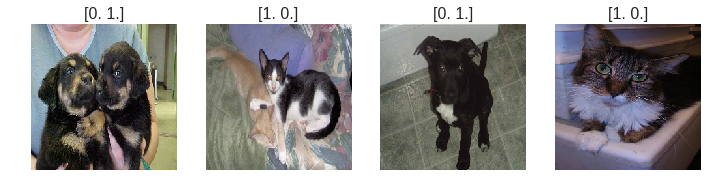

In [43]:
## grab 1 batch = 4 images + 4 labels
imgs, labels = next(batches)

## see the images
plots(imgs, titles=labels)

[1,0] = cat, [0,1] = dog

In [44]:
## pass in images to .predict() method
# will ignore the labels and use the pre-trained VGG model to predict what the four images above are
vgg.predict(imgs, True)

(array([0.2458, 0.1573, 0.1786, 0.6288], dtype=float32),
 array([158, 362, 195, 283]),
 [u'toy_terrier', u'badger', u'Boston_bull', u'Persian_cat'])

believes we have a toy_terrier, badger, boston bull, and persian cat. so 3/4 = 75% --> confused by backgroudn stuff

also shows probability/confidence in guess --> 24% sure we have a toy terrier, most confident in persian cat, least in boston bull

In [45]:
## extract out 1st four category indexes based on ordering of categories in VGG model
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

can take the above probabilties + turn into cats vs dogs model (next class = in-depth revisit of how this works)

there are 1k probabilties (1 for each category label in the model) --> we will turn into cats vs dog predictions w/ `.finetune()`

In [0]:
## build new model and replace original 1000 categories with the classes found in cats and dogs dir
# these dir's foudn in path/train folder
# returned fine-tuned model that will search for cats + dogs
vgg.finetune(batches)

now we must trian the model w/ `.fit` which uses gradient descent (backprop) to attempt to make model better + better at IDing cats vs. dogs

will be fast + inaccurate since we only have 16 data objects in sample

In [47]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 1s - loss: 0.5051 - acc: 0.8125 - val_loss: 0.4130 - val_acc: 0.8750


as we run more + more, accuracy will increase, but validaitoin accuracy will not as much

In [48]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.3248 - acc: 0.7500 - val_loss: 0.1942 - val_acc: 0.8750


In [49]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.0394 - acc: 1.0000 - val_loss: 0.0846 - val_acc: 1.0000


In [50]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.0421 - acc: 1.0000 - val_loss: 0.0551 - val_acc: 1.0000


The code above will work for any image recognition task, with any number of categories! All you have to do is to put your images into one folder per category, and run the code above.

Let's take a look at how this works in 1 code block

In [0]:
# Want batch size as large as possible, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

## Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

## create VGG object to get access to the pre-trained network
vgg = Vgg16()

## inside VGG model, go to the 'train' folder from path + grab
batches = vgg.get_batches(path_smpl+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

## Use Vgg16 for basic image recognition

Let's start off by using the *Vgg16* class to recognise the main imagenet category for each image.

We won't be able to enter the Cats vs Dogs competition with an Imagenet model alone, since 'cat' and 'dog' are not categories in Imagenet - instead each individual breed is a separate category. However, we can use it to see how well it can recognise the images, which is a good first step.

First, create a Vgg16 object:

In [0]:
vgg = Vgg16()

Vgg16 is built on top of *Keras* (which we will be learning much more about shortly!), a flexible, easy to use deep learning library that sits on top of Theano or Tensorflow. Keras reads groups of images and labels in *batches*, using a fixed directory structure, where images from each category for training must be placed in a separate folder.

Let's grab batches of data from our training folder:

In [0]:
batches = vgg.get_batches(path+'train', batch_size=4)

(BTW, when Keras refers to 'classes', it doesn't mean python classes - but rather it refers to the categories of the labels, such as 'pug', or 'tabby'.)

*Batches* is just a regular python iterator. Each iteration returns both the images themselves, as well as the labels.

In [0]:
imgs,labels = next(batches)

As you can see, the labels for each image are an array, containing a 1 in the first position if it's a cat, and in the second position if it's a dog. This approach to encoding categorical variables, where an array containing just a single 1 in the position corresponding to the category, is very common in deep learning. It is called *one hot encoding*. 

The arrays contain two elements, because we have two categories (cat, and dog). If we had three categories (e.g. cats, dogs, and kangaroos), then the arrays would each contain two 0's, and one 1.

In [0]:
plots(imgs, titles=labels)

We can now pass the images to Vgg16's predict() function to get back probabilities, category indexes, and category names for each image's VGG prediction.

In [0]:
vgg.predict(imgs, True)

The category indexes are based on the ordering of categories used in the VGG model - e.g here are the first four:

In [0]:
vgg.classes[:4]

(Note that, other than creating the Vgg16 object, none of these steps are necessary to build a model; they are just showing how to use the class to view imagenet predictions.)